# Multiple Regression (Advertising Dataset)
#### multiple_regression_advertising.ipynb

## Goal
- Understand multiple linear regression using a small sample dataset
- Compare simple regression vs multiple regression
- Learn basic interpretation (coefficients, R²) and diagnostics (residuals, VIF)

Dataset:
- X: TV, Radio, Newspaper
- y: Sales

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# (Optional) for train/test evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
print("hello")


hello


In [3]:
# notebook: 01_multiple_regression/notebooks/
# data:     01_multiple_regression/data/advertising.csv
DATA_PATH = Path("..") /"data" /"advertising.csv"

df = pd.read_csv(DATA_PATH)

print(df.head())
print(df.info())
print(df.describe())

# Basic checks
print("Missing values:\n", df.isna().sum())



      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         20 non-null     float64
 1   Radio      20 non-null     float64
 2   Newspaper  20 non-null     float64
 3   Sales      20 non-null     float64
dtypes: float64(4)
memory usage: 772.0 bytes
None
               TV      Radio   Newspaper     Sales
count   20.000000  20.000000   20.000000  20.00000
mean   119.310000  27.740000   42.010000  13.49500
std     84.178425  15.442573   29.596797   5.43289
min      8.600000   2.100000    1.000000   4.80000
25%     54.250000  17.400000   18.900000   9.60000
50%    108.850000  32.850000   45.550000  12.15000
75%    196.500000  39.375000   60.350000  17.67500
max    

## EDA (Exploratory Data Analysis)

We check:
- Relationship between each feature and Sales
- Correlation among variables



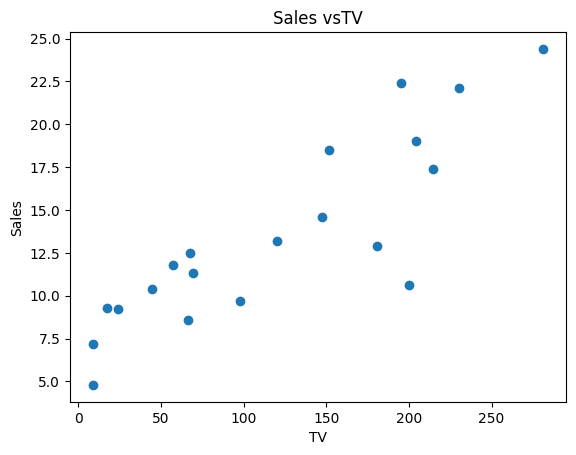

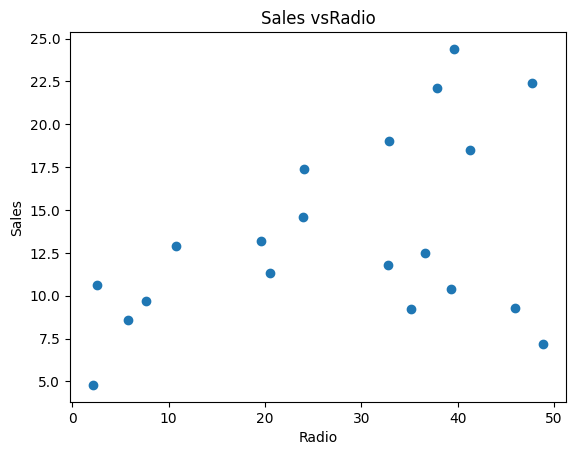

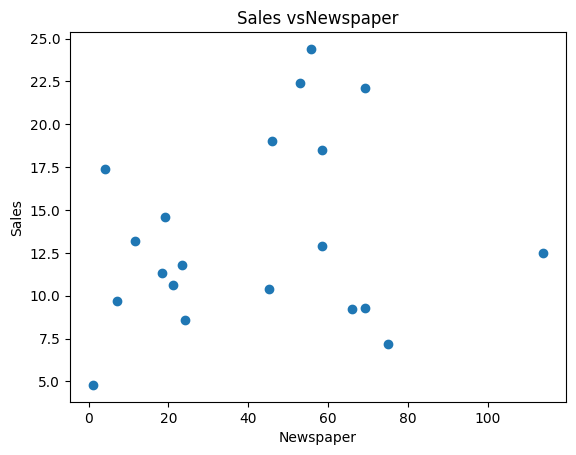

In [4]:
features = ["TV","Radio","Newspaper"]
target ="Sales"

for col in features:
    plt.figure()
    plt.scatter(df[col], df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{target} vs{col}")
    plt.show()



                 TV     Radio  Newspaper     Sales
TV         1.000000  0.006860  -0.044222  0.862925
Radio      0.006860  1.000000   0.677822  0.429610
Newspaper -0.044222  0.677822   1.000000  0.204532
Sales      0.862925  0.429610   0.204532  1.000000


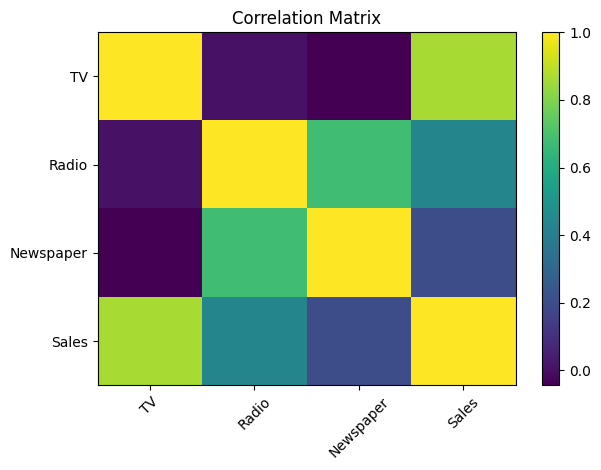

In [5]:
corr = df[features + [target]].corr()
print(corr)

plt.figure()
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Matrix")
plt.colorbar()
plt.tight_layout()
plt.show()


## Simple Regression: Sales ~ TV

We fit an OLS model:
Sales = β0 + β1 * TV + ε



In [6]:
X_simple = df[["TV"]]
y = df[target]

X_simple_const = sm.add_constant(X_simple)  # add intercept
model_simple = sm.OLS(y, X_simple_const).fit()

print(model_simple.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     52.49
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           9.76e-07
Time:                        23:37:52   Log-Likelihood:                -48.064
No. Observations:                  20   AIC:                             100.1
Df Residuals:                      18   BIC:                             102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8502      1.113      6.154      0.0

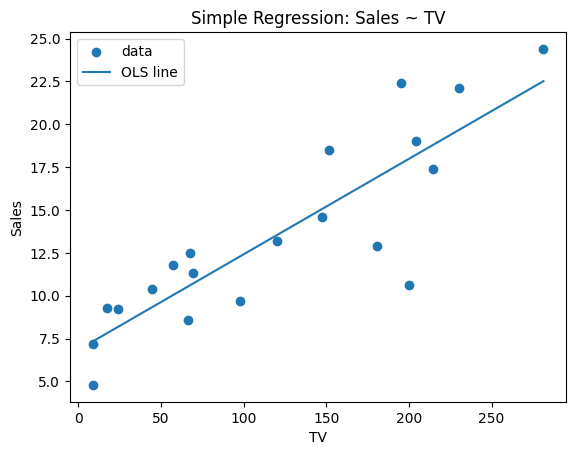

In [8]:
tv_min, tv_max = df["TV"].min(), df["TV"].max()
tv_grid = np.linspace(tv_min, tv_max,100)
X_grid = sm.add_constant(pd.DataFrame({"TV": tv_grid}))

y_pred_grid = model_simple.predict(X_grid)

plt.figure()
plt.scatter(df["TV"], y, label="data")
plt.plot(tv_grid, y_pred_grid, label="OLS line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Simple Regression: Sales ~ TV")
plt.legend()
plt.show()



## Multiple Regression: Sales ~ TV + Radio + Newspaper

Model:
Sales = β0 + β1*TV + β2*Radio + β3*Newspaper + ε

We compare:
- coefficients and their meanings
- R² vs simple regression



In [9]:
X_multi = df[features]
X_multi_const = sm.add_constant(X_multi)

model_multi = sm.OLS(y, X_multi_const).fit()
print(model_multi.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     68.60
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           2.37e-09
Time:                        23:40:50   Log-Likelihood:                -35.423
No. Observations:                  20   AIC:                             78.85
Df Residuals:                      16   BIC:                             82.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8594      0.915      3.126      0.0

In [10]:
print("R² (simple):", model_simple.rsquared)
print("R² (multi) :", model_multi.rsquared)

coef_compare = pd.DataFrame({
"simple(TV only)": model_simple.params,
"multiple": model_multi.params
})
print(coef_compare)



R² (simple): 0.7446392377789464
R² (multi) : 0.9278642233391057
           simple(TV only)  multiple
Newspaper              NaN -0.015225
Radio                  NaN  0.168856
TV                0.055693  0.055244
const             6.850231  2.859383


## Diagnostics

We check:
- residual plot (fitted vs residuals)
- Q-Q plot (rough normality check)
- VIF (multicollinearity)



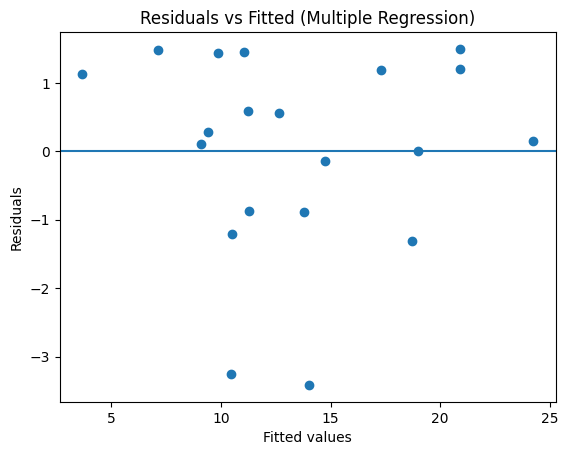

In [11]:
fitted = model_multi.fittedvalues
resid = model_multi.resid

plt.figure()
plt.scatter(fitted, resid)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Multiple Regression)")
plt.show()



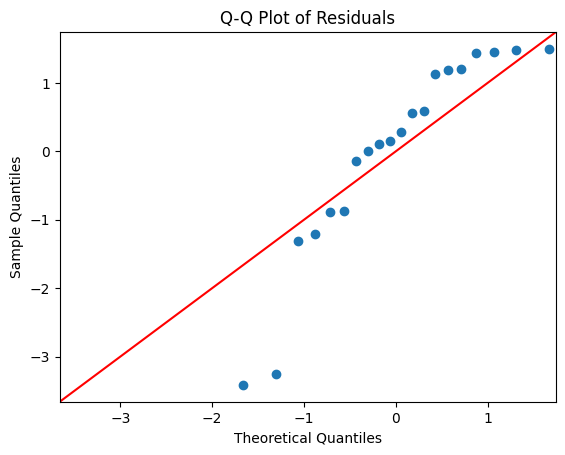

In [13]:
sm.qqplot(resid, line="45")
plt.title("Q-Q Plot of Residuals")
plt.show()



In [15]:
# VIF needs X without target; include constant or not?
# Commonly calculate VIF on features only (no constant)
X_vif = df[features].copy()

vif_table = pd.DataFrame({
"feature": X_vif.columns,
"VIF": [variance_inflation_factor(X_vif.values, i)for i in range(X_vif.shape[1])]
})
print(vif_table)



     feature       VIF
0         TV  2.116002
1      Radio  6.692109
2  Newspaper  5.673466


## (Optional) Train/Test Evaluation

This is not the main focus, but we calculate RMSE to get a feel for prediction error.



In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.3, random_state=42)

X_train_c = sm.add_constant(X_train)
X_test_c  = sm.add_constant(X_test)

model_tt = sm.OLS(y_train, X_train_c).fit()
y_pred = model_tt.predict(X_test_c)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)



RMSE: 2.347006707718602


## Summary

- Simple regression (TV only) gives a baseline understanding
- Multiple regression shows how each channel contributes while controlling others
- Diagnostics (residuals, Q-Q) help check assumptions
- VIF helps detect multicollinearity

Next:
- Multicollinearity deeper dive
- Feature selection / regularization (Ridge, Lasso)
- PCA as a dimension-reduction tool
